In [1]:
from IPython.display import HTML
HTML('<iframe src="http://pydata.org/nyc2014/schedule/" width=100% height=350></iframe>')

In [2]:
from bs4 import BeautifulSoup
import urllib2

# past events
# TODO: fetch this data from past events page
conferences = ['nyc2014', 'berlin2014', 'sv2014', 'ldn2014', 'nyc2013']

abstract_url = "http://pydata.org/%s/abstracts/"

conf_data = {}

# Collecting data about abstracts
for conference in conferences:
    print "loading data for %s conference" % conference
    raw = urllib2.urlopen(abstract_url % conference).read()
    soup = BeautifulSoup(raw)
    abstracts = [abstract.get_text().strip() for abstract in soup.find_all(class_="accordion-inner")]
    titles = [title.get_text().strip() for title in soup.find_all(class_="accordion-toggle")]
#     speakers = [speaker.get_text().strip() for speaker in soup.select(".accordion-heading h5 a")]
    
    conf_data[conference] = {}
    conf_data[conference]['abstracts'] = abstracts
    conf_data[conference]['titles'] = titles
#     conf_data[conference]['speakers'] = speakers

loading data for nyc2014 conference
loading data for berlin2014 conference
loading data for sv2014 conference
loading data for ldn2014 conference
loading data for nyc2013 conference


In [3]:
conf_data['nyc2014']['titles'][:20]

[u'(Easy), High Performance Text Processing with Rosetta',
 u'A Machine Learning Pipeline with Scikit-Learn',
 u'Advanced IPython Notebook Widgets',
 u'Advanced scikit-learn',
 u'Analyzing Satellite Images With Python Scientific Stack',
 u'Beautiful Interactive Visualizations in the Browser with Bokeh',
 u'Biological Data Science',
 u'Blaze Foundations: Part 1',
 u'Data Community/Meetup Organizers',
 u"Data Science: It's Easy as Py\u01c3",
 u'Data warehouse and conceptual modelling with Cubes 1.0',
 u'Data-driven conversations about biology',
 u'Decreasing Uncertainty with Weakly Informative Priors and Penalized Regression',
 u'Disco: Distributed Multi-Stage Data Pipelines',
 u'Driving Blaze in the Real World of Data Land Mines',
 u'Evaluating skills in educational and other settings: An overview',
 u'From DataFrame to Web Application in 10 minutes',
 u'Get To Know Your Data',
 u'Grids, Streets & Pipelines: Making a linguistic streetmap with scikit-learn',
 u'Healthcare Analytics']

In [4]:
import pandas as pd

pydata = pd.DataFrame()

for conf in conf_data:
    conf_dataframe = pd.DataFrame.from_dict(conf_data[conf])
    conf_dataframe['conference'] = conf
    conf_dataframe['city'] = conf[:-4]
    conf_dataframe['year'] = int(conf[-4:])
    
    print pd.DataFrame.head(conf_dataframe)
    
    pydata = pydata.append(conf_dataframe)
    

                                           abstracts  \
0                                                      
1  The The Greater Plains Collaborative (GPC) is ...   
2  To a lot of people, Facebook is a website for ...   
3  The ad targeting team at Yelp is tasked with p...   
4                                                      

                                              titles conference city  year  
0                                                        sv2014   sv  2014  
1  Using Python and Paver to Control a Large Medi...     sv2014   sv  2014  
2  A Full Stack Approach to Data Visualization: T...     sv2014   sv  2014  
3                               Ad Targeting at Yelp     sv2014   sv  2014  
4  Analyzing Satellite Images With Python Scienti...     sv2014   sv  2014  
                                           abstracts  \
0  The Python data ecosystem has grown beyond the...   
1  In this talk I will give an overview of Random...   
2  Clustering data is a fundament

In [5]:
print 'records in dataframe %i' % len(pydata)
pydata.groupby(['conference']).count(1).sort('year', ascending=False)

records in dataframe 233


,abstracts,titles,city,year
conference,,,,
berlin2014,50,50,50,50
nyc2014,50,50,50,50
sv2014,49,49,49,49
ldn2014,44,44,44,44
nyc2013,40,40,40,40


# Now we have all the data. Let's try to analyse it








### So what size of proposal do they usually have?

In [6]:
abstract_lens = [len(abst) for abst in pydata['abstracts'] if len(abst) > 44]
print abstract_lens
print

import matplotlib.pyplot as plt
plt.hist(abstract_lens)

[961, 741, 326, 534, 534, 2089, 738, 306, 2222, 1331, 421, 402, 650, 490, 822, 415, 752, 188, 188, 553, 444, 1300, 663, 991, 536, 913, 911, 2362, 865, 1415, 918, 1145, 1198, 1023, 1311, 581, 1889, 277, 1015, 2281, 684, 1057, 783, 590, 902, 366, 657, 504, 1182, 266, 1390, 534, 877, 880, 398, 445, 733, 619, 1598, 668, 415, 1056, 764, 534, 618, 1148, 1688, 918, 616, 440, 172, 220, 982, 674, 1127, 896, 1092, 1036, 685, 707, 493, 901, 2022, 414, 221, 294, 1842, 548, 825, 827, 689, 690, 1531, 249, 1004, 242, 395, 727, 173, 896, 453, 108, 928, 762, 253, 212, 480, 2093, 503, 1195, 1571, 477, 1268, 408, 1721, 264, 1522, 1113, 578, 885, 650, 1893, 561, 559, 670, 722, 128, 1196, 1179, 1395, 742, 415, 188, 460, 1158, 534, 315, 908, 1805, 1093, 684, 788, 2347, 2347, 902, 756, 1234, 604, 909, 1048, 2270, 2000, 277, 793, 1129, 860, 698, 513, 1025, 919, 632, 829, 132, 637, 683, 1092, 568, 359, 456, 1024, 2760, 1013, 771, 66, 535, 893, 1115, 394, 499, 646, 875, 1542, 1055, 1255, 430, 1015, 545, 599, 42

(array([23, 46, 45, 43, 17,  7,  6,  4,  6,  1]),
 array([   66. ,   335.4,   604.8,   874.2,  1143.6,  1413. ,  1682.4,
         1951.8,  2221.2,  2490.6,  2760. ]),
 <a list of 10 Patch objects>)

In [7]:
pd.DataFrame(abstract_lens).describe()

,0
count,198.000000
mean,857.909091
std,509.960197
min,66.000000
25%,506.250000
50%,759.000000
75%,1056.750000
max,2760.000000


### What about word corpus from different years

In [8]:
import nltk
stop = nltk.corpus.stopwords.words('english')

text = {}
words = {}

In [9]:
stop_list = ["ll", "II", "ll", "http", "://", "e", "g", "2", "0"]

for conference in conf_data:
    raw = " ".join(conf_data[conference]['abstracts'])
    tokens = nltk.WordPunctTokenizer().tokenize(raw)
    text[conference] = nltk.Text(tokens)
    words[conference] = [w.lower() for w in text[conference] if w.lower() not in stop_list]
    words[conference] = [w for w in words[conference] if w not in stop]
    words[conference] = filter(lambda word: word not in u'%,-:()$\/;?.’–“”*\'[]', words[conference])
    words[conference] = [w for w in words[conference] if w not in ["ll", "II", "ll", "http", "://", "e", "g", "2", "0"]]

In [10]:
for conference in text:
    print conference
    print text[conference].collocations()
    print 
    

sv2014
http ://; nearest neighbor; machine learning; Reference Model;
neighbor algorithm; IPython Notebook; big data; open source; make
predictions; data analysis; Big Data; github repository; current
state; means clustering; visualization libraries; https ://; compiler
optimizations; accepting payments; block fraud; concise construction
None

ldn2014
http ://; machine learning; :// www; data processing; open source;
Matrix Factorisation; certain types; public clouds; rent ratios;
financial industry; PyData Boston; blocking technique; cloud
computing; exact solution; includes two; presentation focuses; drug
development; graphical plotting; quantum chemistry; wide range
None

berlin2014
http ://; machine learning; Big Data; Quantified Self; self tracking;
Semantic Web; Coming Soon; among others; open source; data analysis;
case study; Hadoop jobs; :// www; working knowledge; predictive model;
time permits; Add tranformations; Machine Learning; Operating System;
Pythonista interested
Non

### Words used in abstracts

In [11]:
numwords = {}
uniwords = {}

for conference in text:
    numwords[conference] = len(text[conference])
    uniwords[conference] = len(set(text[conference]))

for conference in reversed(conferences):
    print "%s: \tnumwords - %i, unique - %i" % \
        (conference, numwords[conference], uniwords[conference])

nyc2013: 	numwords - 4328, unique - 1337
ldn2014: 	numwords - 5859, unique - 1738
sv2014: 	numwords - 7462, unique - 1906
berlin2014: 	numwords - 7633, unique - 1877
nyc2014: 	numwords - 6293, unique - 1824


# Bigrams

In [12]:
from nltk.collocations import *

bigram_measures = nltk.collocations.BigramAssocMeasures()
trigram_measures = nltk.collocations.TrigramAssocMeasures()


for conference in reversed(conferences):
    print "Bigrams " + str(conference)
    finder = BigramCollocationFinder.from_words(words[conference])
    scored = finder.score_ngrams(bigram_measures.raw_freq)
    print pd.DataFrame(scored[:25])
    print "\n\n"

Bigrams nyc2013
                              0         1
0           (machine, learning)  0.008183
1               (scikit, learn)  0.005168
2                (coming, soon)  0.003445
3              (data, analysis)  0.002153
4                (chip, design)  0.001723
5               (data, science)  0.001723
6             (image, features)  0.001723
7           (ipython, notebook)  0.001723
8                (open, source)  0.001723
9                   (scidb, py)  0.001723
10           (data, scientists)  0.001292
11       (learning, algorithms)  0.001292
12            (learning, tasks)  0.001292
13               (models, like)  0.001292
14               (talk, covers)  0.001292
15       (across, organization)  0.000861
16    (analytics, capabilities)  0.000861
17               (array, based)  0.000861
18            (array, oriented)  0.000861
19            (asynchronous, o)  0.000861
20  (asynchronous, programming)  0.000861
21               (broad, range)  0.000861
22                

# Year over Year

In [13]:
result = pd.DataFrame()

for conference in reversed(conferences):
    finder = BigramCollocationFinder.from_words(words[conference], window_size = 2)
    ignored_words = nltk.corpus.stopwords.words('english')
    finder.apply_word_filter(lambda w: len(w) < 3 or w.lower() in ignored_words)
    scores = finder.score_ngrams(bigram_measures.raw_freq)
    
    if len(result) == 0:
        result = pd.DataFrame(scores, columns=["ngram", str(conference)])
    else:
        result = result.merge(pd.DataFrame(scores, columns=["ngram", str(conference)]))
        
print result[:15]

                  ngram   nyc2013   ldn2014    sv2014  berlin2014   nyc2014
0   (machine, learning)  0.008183  0.001969  0.002550    0.002329  0.004188
1       (scikit, learn)  0.005168  0.001312  0.002295    0.001294  0.003290
2      (data, analysis)  0.002153  0.000656  0.001530    0.002070  0.000897
3       (data, science)  0.001723  0.001312  0.001530    0.001035  0.003290
4   (ipython, notebook)  0.001723  0.000984  0.002040    0.001294  0.000598
5        (open, source)  0.001723  0.001312  0.002295    0.001294  0.002692
6        (python, data)  0.000861  0.000328  0.000765    0.000259  0.000299
7     (user, interface)  0.000861  0.000328  0.000765    0.000259  0.000299
8           (big, data)  0.000431  0.000656  0.002805    0.001811  0.001496
9        (data, driven)  0.000431  0.000656  0.000510    0.001035  0.000598
10         (data, sets)  0.000431  0.000656  0.000765    0.000259  0.001197
11         (every, day)  0.000431  0.000328  0.000510    0.000259  0.000299
12  (high, p

In [14]:
transposed = result[:10].transpose()
headers = transposed[0:1:].values
print headers

[[(u'machine', u'learning') (u'scikit', u'learn') (u'data', u'analysis')
  (u'data', u'science') (u'ipython', u'notebook') (u'open', u'source')
  (u'python', u'data') (u'user', u'interface') (u'big', u'data')
  (u'data', u'driven')]]


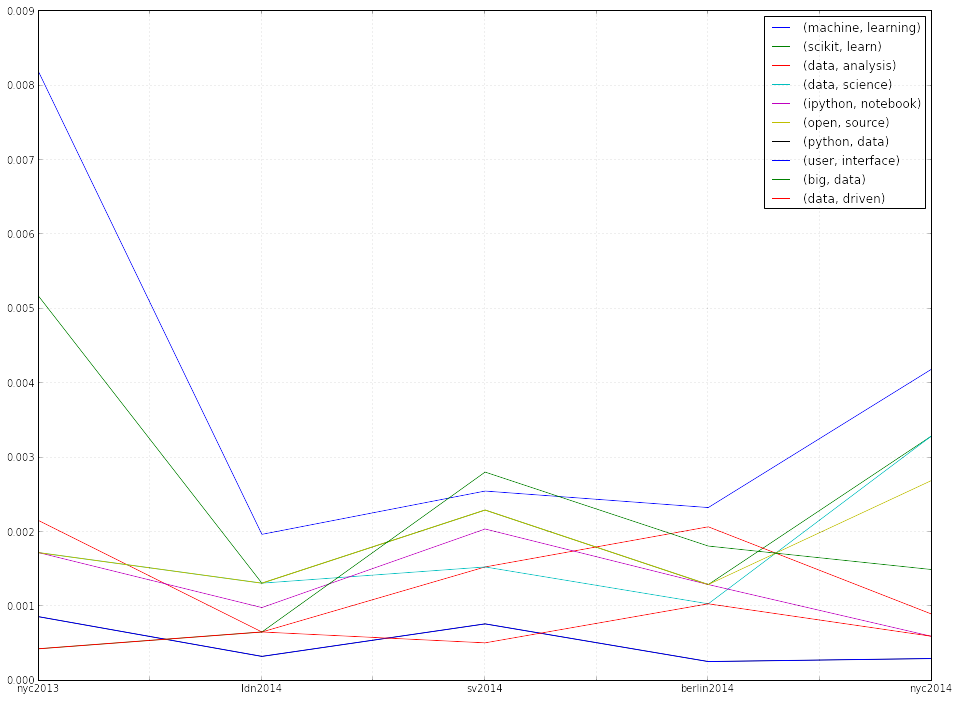

In [15]:
%matplotlib inline

new_transposed = transposed[1::]
new_transposed.columns = headers[0]
new_transposed.plot(figsize=(16,12))